In [32]:
from DiffEqPy import Variable
from DiffEqPy.functions import *
from DiffEqPy.utils import *
from DiffEqPy.layers import *
from DiffEqPy.models import MLP
from DiffEqPy.optimizers import SGD
from DiffEqPy.datasets import *
import matplotlib.pyplot as plt
import numpy as np
import math

In [33]:
x,t = get_spiral(train = True)

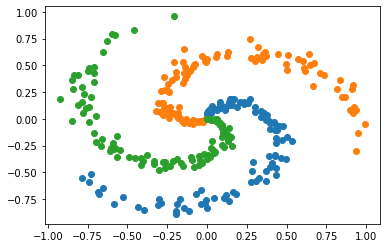

In [34]:
for i in range(len(set(t))):
    xi = x[t == i]
    plt.scatter(xi[:,0], xi[:,1])

In [35]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.

model = MLP((hidden_size,3))
optimizer = SGD(lr).setup(model)

In [36]:
data_size = len(x)
max_iter = math.ceil(data_size / batch_size)

In [37]:
data_size

300

In [38]:
loss_his = []
for epoch in range(max_epoch):
    index = np.random.permutation(data_size)
    sum_loss = 0
    
    for i in range(max_iter):
        batch_index = index[i*batch_size : (i+1)*batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]
        
        y = model(batch_x)
        loss = F.softmax_cross_entropy_simple(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        
        sum_loss += float(loss.data) * len(batch_t)
        
    avg_loss = sum_loss / data_size
    loss_his.append(avg_loss)
    print("epoch %d, loss %.2f" % (epoch+1, avg_loss))

TypeError: an integer is required (got type NoneType)